# Matrix Product States

In [1]:
%config InlineBackend.figure_formats = ['svg']
from quimb.tensor import *
import quimb as qu
import quimb.tensor as qtn
import numpy as np

In [2]:
p = MPS_rand_state(L=20, bond_dim=50)
print(f"Site tags: '{p.site_tag_id}', site inds: '{p.site_ind_id}'")

Site tags: 'I{}', site inds: 'k{}'


In [3]:
print(p)

MatrixProductState([
    Tensor(shape=(50, 2), inds=('_c5702aAAAAA', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAA', '_c5702aAAAAB', 'k1'), tags=oset(['I1'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAB', '_c5702aAAAAC', 'k2'), tags=oset(['I2'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAC', '_c5702aAAAAD', 'k3'), tags=oset(['I3'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAD', '_c5702aAAAAE', 'k4'), tags=oset(['I4'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAE', '_c5702aAAAAF', 'k5'), tags=oset(['I5'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAF', '_c5702aAAAAG', 'k6'), tags=oset(['I6'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAG', '_c5702aAAAAH', 'k7'), tags=oset(['I7'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAH', '_c5702aAAAAI', 'k8'), tags=oset(['I8'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAI', '_c5702aAAAAJ', 'k9'), tags=oset(['I9'])),
    Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAJ

In [4]:
p.show()

 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 
●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●
│  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


In [5]:
p.left_canonize()
p.show()

 2 4 8 16 32 50 50 50 50 50 50 50 50 50 50 50 50 50 50 
>─>─>─>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──●
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


In [6]:
p.H @ p

1.0000000000000007

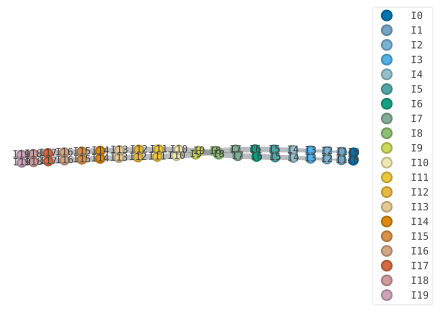

In [7]:
(p.H & p).draw(color=[f'I{i}' for i in range(20)])

In [8]:
p2 = (p + p) / 2
p2.show()

 4 8 16 32 64 100 100 100 100 100 100 100 100 100 100 100 100 100 100 
●─●─●──●──●──●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●
│ │ │  │  │  │   │   │   │   │   │   │   │   │   │   │   │   │   │   │


In [9]:
p2.H @ p2

1.0000000000000007

In [10]:
p2.compress(form=10)
p2.show()

 2 4 8 16 32 50 50 50 50 50 50 50 50 50 32 16 8 4 2 
>─>─>─>──>──>──>──>──>──>──●──<──<──<──<──<──<─<─<─<
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │ │


In [11]:
p2[10]

Tensor(shape=(50, 50, 2), inds=('_c5702aAAAAJ', '_c5702aAAAAK', 'k10'), tags=oset(['I10']))

# TEBD

In [12]:
builder = SpinHam1D(S=1 / 2)

In [13]:
builder

Heisenberg model.

In [14]:
H = ham_1d_heis(20, bz=0.1, cyclic=False)

In [15]:
H.terms[0, 1]

array([[ 0.175,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.275,  0.5  ,  0.   ],
       [ 0.   ,  0.5  , -0.225,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.325]])

In [16]:
H.terms[2, 3]

array([[ 0.2 ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.5 ,  0.  ],
       [ 0.  ,  0.5 , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.3 ]])

In [17]:
H_heis_man = 0.25 * (
    np.kron(qu.pauli('X'), qu.pauli('X')) +
    np.kron(qu.pauli('Y'), qu.pauli('Y')) +
    np.kron(qu.pauli('Z'), qu.pauli('Z')) -
    0.1 * np.kron(qu.pauli('Z'), np.eye(2)) -
    0.1 * np.kron(np.eye(2), qu.pauli('Z'))
)

In [18]:
H_heis_man

[[ 0.2 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.25+0.j  0.5 +0.j  0.  +0.j]
 [ 0.  +0.j  0.5 +0.j -0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.3 +0.j]]

Ising model.

In [19]:
H_ising = ham_1d_ising(20, bx=0.1, cyclic=False)

In [20]:
H_ising.terms[0, 1]

array([[ 0.25 , -0.025, -0.05 ,  0.   ],
       [-0.025, -0.25 ,  0.   , -0.05 ],
       [-0.05 ,  0.   , -0.25 , -0.025],
       [ 0.   , -0.05 , -0.025,  0.25 ]])

In [21]:
H_ising.terms[2, 3]

array([[ 0.25 , -0.025, -0.025,  0.   ],
       [-0.025, -0.25 ,  0.   , -0.025],
       [-0.025,  0.   , -0.25 , -0.025],
       [ 0.   , -0.025, -0.025,  0.25 ]])

In [22]:
H_ising_man = 0.25 * (
    np.kron(qu.pauli('Z'), qu.pauli('Z')) -
    0.1 * np.kron(qu.pauli('X'), np.eye(2)) -
    0.1 * np.kron(np.eye(2), qu.pauli('X'))
)

In [23]:
H_ising_man

[[ 0.25 +0.j -0.025+0.j -0.025+0.j  0.   +0.j]
 [-0.025+0.j -0.25 +0.j  0.   +0.j -0.025+0.j]
 [-0.025+0.j  0.   +0.j -0.25 +0.j -0.025+0.j]
 [ 0.   +0.j -0.025+0.j -0.025+0.j  0.25 +0.j]]

Create initial state.

In [24]:
psi0 = MPS_neel_state(20)

In [25]:
print(psi0)

MatrixProductState([
    Tensor(shape=(1, 2), inds=('_c5702aAAAEd', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEd', '_c5702aAAAEe', 'k1'), tags=oset(['I1'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEe', '_c5702aAAAEf', 'k2'), tags=oset(['I2'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEf', '_c5702aAAAEg', 'k3'), tags=oset(['I3'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEg', '_c5702aAAAEh', 'k4'), tags=oset(['I4'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEh', '_c5702aAAAEi', 'k5'), tags=oset(['I5'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEi', '_c5702aAAAEj', 'k6'), tags=oset(['I6'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEj', '_c5702aAAAEk', 'k7'), tags=oset(['I7'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEk', '_c5702aAAAEl', 'k8'), tags=oset(['I8'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEl', '_c5702aAAAEm', 'k9'), tags=oset(['I9'])),
    Tensor(shape=(1, 1, 2), inds=('_c5702aAAAEm', '_c5702aAAAEn', 'k

In [26]:
psi0.show()

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─<
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │


In [27]:
tebd = TEBD(psi0, H)

In [28]:
tebd.update_to(T=3, tol=1e-3)

t=3, max-bond=34: 100%|#########################################################################################################################| 100/100 [00:59<00:00,  1.68%/s]


In [29]:
tebd.pt.show()

 2 4 8 16 29 34 33 34 33 34 33 34 33 34 29 16 8 4 2 
>─>─>─>──>──>──>──>──>──>──>──>──>──>──>──>──>─>─>─●
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │ │


# TEBD 2

Set initial state to zeros apart from two flipped states.

In [30]:
L = 20
zeros = '0' * ((L - 2) // 3)
binary = zeros + '1' + zeros + '1' + zeros
print('psi0:', f"|{binary}>")

psi0: |00000010000001000000>


In [31]:
psi0 = MPS_rand_state(L=L, bond_dim=10)
print(f"Site tags: '{p.site_tag_id}', site inds: '{p.site_ind_id}'")

Site tags: 'I{}', site inds: 'k{}'


In [32]:
psi0.show()

 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 
●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●
│  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


In [33]:
psi0.left_canonize()
psi0.show()

 2 4 8 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 
>─>─>─>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──●
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


Turn into MPS form.

In [34]:
# psi0 = qtn.MPS_computational_state(binary)
# psi0.show()

In [35]:
H = qtn.ham_1d_ising(L)

In [36]:
tebd = qtn.TEBD(psi0, H)

Some parameters:

In [37]:
# Since entanglement will not grow too much, we can set quite
#     a small cutoff for splitting after each gate application
tebd.split_opts['cutoff'] = 1e-12

In [38]:
# times we are interested in
ts = np.linspace(0, 80, 101)

mz_t_j = []  # z-magnetization
be_t_b = []  # block entropy
sg_t_b = []  # schmidt gap

# range of bonds, and sites
js = np.arange(0, L)
bs = np.arange(1, L)

In [39]:
# generate the state at each time in ts
#     and target error 1e-3 for whole evolution
for psit in tebd.at_times(ts, tol=1e-3):
    mz_j = []
    be_b = []
    sg_b = []
    
    # there is one more site than bond, so start with mag
    #     this also sets the orthog center to 0
    mz_j += [psit.magnetization(0)]
    
    for j in range(1, L):
        # after which we only need to move it from previous site
        mz_j += [psit.magnetization(j, cur_orthog=j - 1)]
        be_b += [psit.entropy(j, cur_orthog=j)]
        sg_b += [psit.schmidt_gap(j, cur_orthog=j)]
        
    mz_t_j += [mz_j]
    be_t_b += [be_b]
    sg_t_b += [sg_b]

t=80, max-bond=20: 100%|#######################################################################################################################| 101/101 [00:42<00:00,  2.38it/s]


In [40]:
tebd.pt.show()

 2 4 8 16 19 19 20 20 20 20 20 19 19 20 20 16 8 4 2 
>─>─>─>──>──>──>──>──>──>──>──>──>──>──>──>──>─>─>─●
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │ │


In [41]:
tebd.err

0.0009725403749243912

In [42]:
tebd.pt.H @ tebd.pt

1.0000000000127014

In [43]:
H = qtn.MPO_ham_ising(L)
print("Initial energy:", qtn.expec_TN_1D(psi0.H, H, psi0))
print("Final energy:", qtn.expec_TN_1D(tebd.pt.H , H, tebd.pt))

Initial energy: -0.04216986879233454
Final energy: (-0.04217069061284573-7.37257477290143e-17j)


In [44]:
import matplotlib.pyplot as plt

In [45]:
plt.figure(figsize=(12, 7))

# plot the magnetization
ax1 = plt.subplot(131)
plt.pcolormesh(js, ts, np.real(mz_t_j), vmin=-0.5, vmax=0.5)
plt.set_cmap('RdYlBu')
plt.colorbar()
plt.title('Z-Magnetization')
plt.xlabel('Site')
plt.ylabel('time [ $Jt$ ]')

# plot the entropy
ax2 = plt.subplot(132, sharey=ax1)
plt.pcolormesh(bs, ts, be_t_b)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.set_cmap('viridis'), plt.colorbar()
plt.title('Block Entropy')
plt.xlabel('Bond')

# plot the schmidt gap
ax3 = plt.subplot(133, sharey=ax1)
plt.pcolormesh(bs, ts, sg_t_b, vmin=0, vmax=1)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.set_cmap('magma_r')
plt.colorbar()
plt.title('Schmidt Gap')
plt.xlabel('Bond')

plt.show()